In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

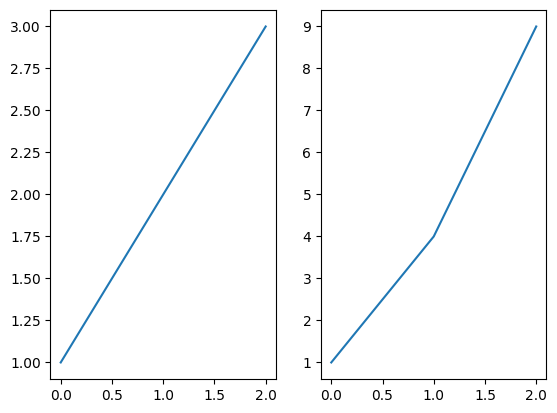

In [2]:
fig = plt.figure(2)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(data)
ax2.plot(x, data2)

plt.show()

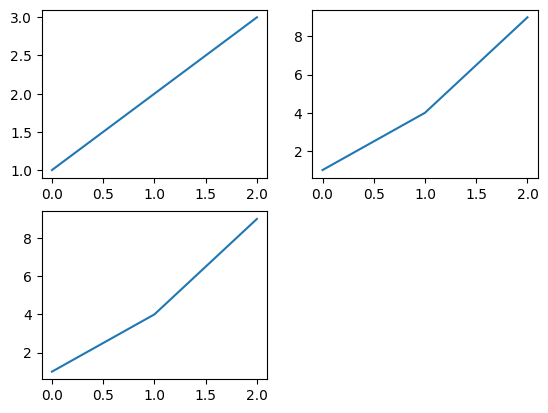

In [3]:
fig = plt.figure(3)

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)


ax.plot(x, data)
ax2.plot(x, data2)
ax3.plot(x, data2)


plt.show()

In [4]:
housing_raw = pd.read_csv("housing_data.csv", 
                      parse_dates=["period_begin", "period_end"],
)

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
    .set_index("period_begin").sort_index()
)

ca_housing_pivot = ca_housing.pivot_table(index="period_begin",
                                          columns = "region_name",
                                          values = "median_active_list_price").assign(
                                          CA_average = lambda x: x.mean(axis=1))

ca_housing_markets = ca_housing_pivot.loc[:, ["San Francisco", 
                                              "Los Angeles", 
                                              "San Diego", 
                                              "Tulare"]]

ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5


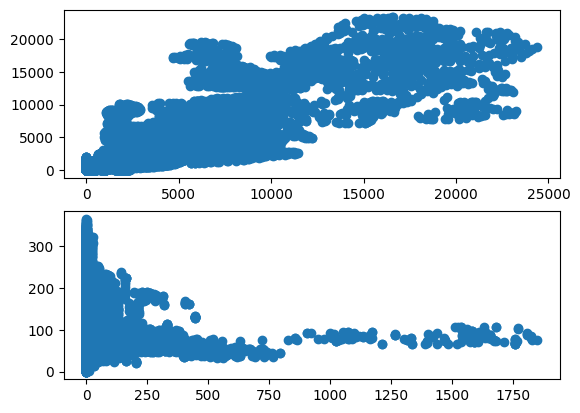

In [5]:
fig, ax = plt.subplots(2, 1)

ax[0].scatter(housing_raw.loc[:, "total_homes_sold"], housing_raw.loc[:, "inventory"])
ax[1].scatter(housing_raw.loc[:, "months_of_supply"], housing_raw.loc[:, "age_of_inventory"])

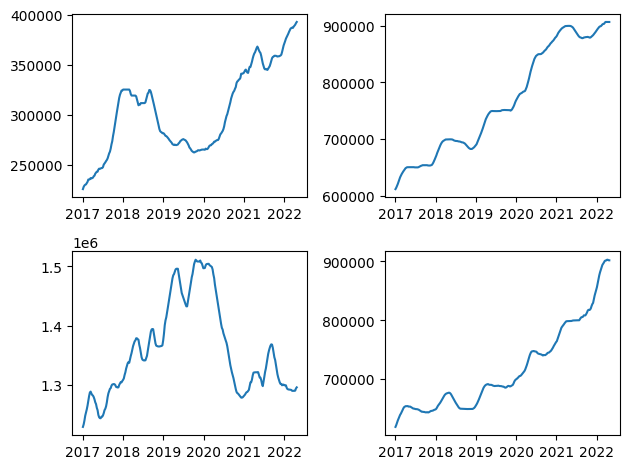

In [7]:
fig, ax = plt.subplots(2, 2, 
                       #sharex='all', 
                       #sharey="all"
                      )

ax[0][0].plot(ca_housing_markets.index, ca_housing_markets["Tulare"])
ax[0][1].plot(ca_housing_markets.index, ca_housing_markets["Los Angeles"])
ax[1][0].plot(ca_housing_markets.index, ca_housing_markets["San Francisco"])
ax[1][1].plot(ca_housing_markets.index, ca_housing_markets["San Diego"])

plt.tight_layout()